## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)

### Importing the Dataset

In [4]:
df = pd.read_csv(r'C:\Commback\Learnings\Data Science\Machine Learning 1\Lead Scoring case study\Lead Scoring Assignment\Leads.csv')

### Inspecting the Dataset

In [5]:
# Read the top few rows of the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Dimensions of the dataset
df.shape

(9240, 37)

#### Replacing the Select values by null values in the columns

In [7]:
select_cols =['Specialization','How did you hear about X Education','Lead Profile','City']
df[select_cols]=df[select_cols].replace('Select',np.nan)

### Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

### Find the columns having a high percentage of missing values


In [9]:
columns_null_percentage = round(df.isnull().sum()/len(df)*100,2)
columns_null_percentage_more_than_35 = columns_null_percentage[columns_null_percentage.values > 35]
columns_null_percentage_more_than_35 

Specialization                        36.58
How did you hear about X Education    78.46
Tags                                  36.29
Lead Quality                          51.59
Lead Profile                          74.19
City                                  39.71
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

### Dropping columns having high percentage of missing values

In [10]:
drop_cols =list(columns_null_percentage_more_than_35.index)

In [11]:
df =df.drop(drop_cols,axis=1)

In [12]:
# Number of columns retained
df.shape

(9240, 27)

In [13]:
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
# Count of unique values in each of the columns in the dataset
df.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Lead Source                                        21
Last Activity                                      17
Last Notable Activity                              16
What is your current occupation                     6
Lead Origin                                         5
What matters most to you in choosing a course       3
Through Recommendations                             2
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
Newspaper Article                                   2
X Education Forums                                  2
Digital Advertisement       

### Analyzing the columns


#### a) Lead Source

In [15]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
youtubechannel          1
blog                    1
welearnblog_Home        1
WeLearn                 1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

#### b) Last Activity

In [16]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [17]:
# dropping rows where Lead Source and  Last Activity is not present(i.e is null)
df.dropna(subset=['Lead Source','Last Activity'], inplace=True)

#### c) Page Views Per Visit

In [18]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### d) TotalVisits

In [19]:
df['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [20]:
# dropping rows where Page Views Per Visit and  TotalVisits is null
df.dropna(subset=['Page Views Per Visit','TotalVisits'], inplace=True)

#### e) Country

In [21]:
round(df['Country'].value_counts() /df['Country'].count()*100,2)

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
France                   0.09
Oman                     0.09
unknown                  0.07
Germany                  0.06
Nigeria                  0.06
South Africa             0.06
Canada                   0.06
Kuwait                   0.06
Sweden                   0.04
Italy                    0.03
Belgium                  0.03
Netherlands              0.03
Uganda                   0.03
Philippines              0.03
Asia/Pacific Region      0.03
Bangladesh               0.03
Ghana                    0.03
China                    0.03
Tanzania                 0.01
Sri Lanka                0.01
Switzerland              0.01
Indonesia                0.01
Vietnam                  0.01
Denmark   

In [22]:
# Dropping the column as it is highly skewed
df =df.drop('Country',axis=1)

#### f) What is your current occupation

In [23]:
df['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
round(df['What is your current occupation'].value_counts()/df['What is your current occupation'].count()*100,2)

Unemployed              85.68
Working Professional    10.59
Student                  3.22
Other                    0.23
Housewife                0.14
Businessman              0.13
Name: What is your current occupation, dtype: float64

In [25]:
# Replacing the Null value by Umemployed  as almost 86% of the customers having not null records are not working
df['What is your current occupation']=df['What is your current occupation'].fillna('Unemployed')

#### g) What matters most to you in choosing a course

In [26]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
# Dropping the column as it is highly skewed
df =df.drop('What matters most to you in choosing a course',axis=1)

In [28]:
# Dropping columns that have only 1 value 
single_value =['Update me on Supply Chain Content','Get updates on DM Content','Magazine','I agree to pay the amount through cheque','Receive More Updates About Our Courses']
df.drop(single_value,axis=1,inplace=True)

#### Checking the columns that are highly skewed in one direction

In [29]:
df['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [30]:
df['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [31]:
df['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [32]:
df['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [33]:
df['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [34]:
df['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [35]:
df['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [36]:
df['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [37]:
df['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [38]:
df['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

#### Dropping columns that are highly skewed

In [39]:
skewed_cols=['Through Recommendations','Do Not Email','Digital Advertisement','Do Not Call','Newspaper','X Education Forums','Newspaper Article','Search']
df = df.drop(skewed_cols,axis=1)

In [40]:
# Percetage of rows retained
print('Percetage of rows retained',round(len(df)/9240*100,2))

Percetage of rows retained 98.2


In [41]:
# Checking the percentage of missing values
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Last Notable Activity                     0.0
A free copy of Mastering The Interview    0.0
What is your current occupation           0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Lead Source                               0.0
Lead Origin                               0.0
Lead Number                               0.0
Prospect ID                               0.0
dtype: float64

In [42]:
# Checking for rows having more than 5 missing values/rows
df[df.isnull().sum(axis=1) >5]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity


## Data Prepartion

#### Converting some binary variables (Yes/No) to 0/1

In [43]:
# List of variables to map
varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [44]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


### Univariate Analysis

#### Checking for Outliers

#### a) TotalVisits

In [45]:
df['TotalVisits'].quantile([.75,.80,.90,.95,.99,1])

0.75      5.0
0.80      5.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

#### b) Total Time Spent on Website

In [46]:
df['Total Time Spent on Website'].quantile([.75,.80,.90,.95,.99,1])

0.75     922.75
0.80    1078.40
0.90    1373.00
0.95    1557.00
0.99    1839.00
1.00    2272.00
Name: Total Time Spent on Website, dtype: float64

#### c) Page Views Per Visit

In [47]:
df['Page Views Per Visit'].quantile([.75,.80,.90,.99,1])

0.75     3.2
0.80     4.0
0.90     5.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

#### Plotting Outliers

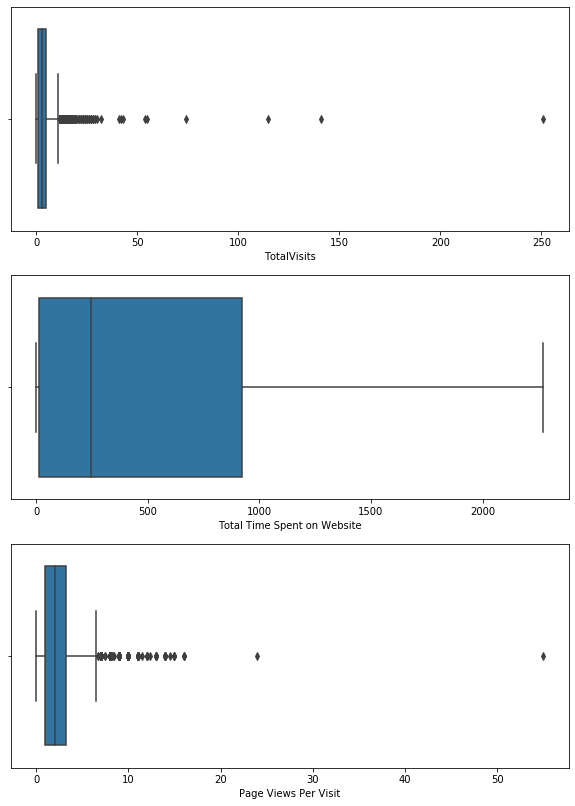

In [48]:
plt.figure(figsize=(10,14))

plt.subplot(3,1,1)
sns.boxplot('TotalVisits',data=df)

plt.subplot(3,1,2)
sns.boxplot('Total Time Spent on Website',data=df)

plt.subplot(3,1,3)
sns.boxplot('Page Views Per Visit',data=df)

plt.show()

#### Identifying Outliers with Skewness
- Explains the extent to which the data is normally distributed. 
- Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.

In [49]:
cols = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit','A free copy of Mastering The Interview']

In [50]:
df[cols].skew()

Converted                                  0.500863
TotalVisits                               19.921091
Total Time Spent on Website                0.970703
Page Views Per Visit                       2.877019
A free copy of Mastering The Interview     0.780403
dtype: float64

#### Outlier Treatment (Capping outliers)

In [51]:
Q4=df['TotalVisits'].quantile(0.99)

In [52]:
print(Q4)

17.0


In [53]:
df['TotalVisits'][df['TotalVisits'] >= Q4]=Q4

In [54]:
Q4=df['Page Views Per Visit'].quantile(0.99)

In [55]:
df['Page Views Per Visit'][df['Page Views Per Visit'] >= Q4]=Q4

#### Checking Skewness after capping the outliers

In [56]:
df[cols].skew()

Converted                                 0.500863
TotalVisits                               1.607299
Total Time Spent on Website               0.970703
Page Views Per Visit                      0.912265
A free copy of Mastering The Interview    0.780403
dtype: float64

#### Plotting graphs after capping the outliers

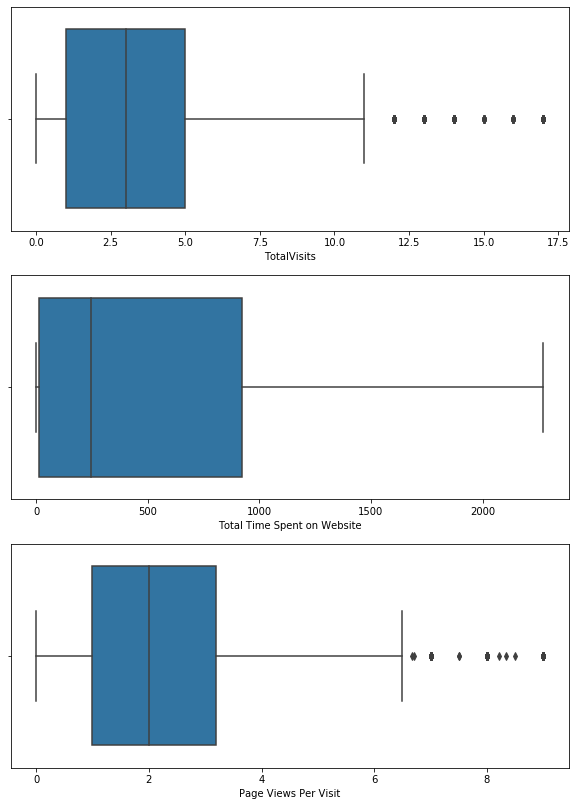

In [57]:
plt.figure(figsize=(10,14))

plt.subplot(3,1,1)
sns.boxplot('TotalVisits',data=df)

plt.subplot(3,1,2)
sns.boxplot('Total Time Spent on Website',data=df)

plt.subplot(3,1,3)
sns.boxplot('Page Views Per Visit',data=df)

plt.show()

### Binning Variables

#### a) Lead Source - Binning  values having less percentage of records  as 'Other'

In [58]:
df['Lead Source']=df['Lead Source'].replace('google','Google')

In [59]:
df['Lead Source'].value_counts()/df['Lead Source'].count()*100

Google               31.661891
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
Click2call            0.044082
Live Chat             0.022041
Social Media          0.022041
Press_Release         0.022041
blog                  0.011020
welearnblog_Home      0.011020
WeLearn               0.011020
youtubechannel        0.011020
NC_EDM                0.011020
testone               0.011020
Pay per Click Ads     0.011020
Name: Lead Source, dtype: float64

In [60]:
lead_cols=['Google','Direct Traffic','Olark Chat','Organic Search']

In [61]:
leaddf =df[~df['Lead Source'].isin(lead_cols)]

In [62]:
other_lead_sources=list(leaddf['Lead Source'].value_counts().index)

In [63]:
print(other_lead_sources)

['Reference', 'Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'Click2call', 'Live Chat', 'Social Media', 'Press_Release', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel', 'WeLearn', 'NC_EDM', 'Pay per Click Ads']


In [64]:
df['Lead Source']=df['Lead Source'].replace(other_lead_sources,'Other')

In [65]:
df['Lead Source'].value_counts()

Google            2873
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Other              751
Name: Lead Source, dtype: int64

In [66]:
df['Last Activity'].value_counts()/df['Last Activity'].count()*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Resubscribed to emails           0.011020
Visited Booth in Tradeshow       0.011020
Name: Last Activity, dtype: float64

In [67]:
df['Last Notable Activity'].value_counts()/df['Last Notable Activity'].count()*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Approached upfront               0.011020
Resubscribed to emails           0.011020
Email Received                   0.011020
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Name: Last Notable Activity, dtype: float64

In [68]:
# Dropping Last Notable Activity column as it is highly correlated with Last Activity
df.drop('Last Notable Activity',axis=1,inplace=True)

In [69]:
df.nunique().sort_values()

Converted                                    2
A free copy of Mastering The Interview       2
Lead Origin                                  4
Lead Source                                  5
What is your current occupation              6
Last Activity                               17
TotalVisits                                 18
Page Views Per Visit                       102
Total Time Spent on Website               1717
Prospect ID                               9074
Lead Number                               9074
dtype: int64

#### b) What is your current occupation - Binning occupation into 3 classes : Unemployed,Working Professional and Student

In [70]:
df['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [71]:
df['What is your current occupation']=df['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Student')

In [72]:
df['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  238
Name: What is your current occupation, dtype: int64

#### c) Last Activity

In [73]:
df['Last Activity'].value_counts()/df['Last Activity'].count()

Email Opened                    0.378223
SMS Sent                        0.299317
Olark Chat Conversation         0.107119
Page Visited on Website         0.070531
Converted to Lead               0.047168
Email Bounced                   0.034384
Email Link Clicked              0.029425
Form Submitted on Website       0.012784
Unreachable                     0.009918
Unsubscribed                    0.006502
Had a Phone Conversation        0.002755
View in browser link Clicked    0.000661
Approached upfront              0.000551
Email Received                  0.000220
Email Marked Spam               0.000220
Resubscribed to emails          0.000110
Visited Booth in Tradeshow      0.000110
Name: Last Activity, dtype: float64

In [74]:
activity_cols=['Email Opened','SMS Sent','Olark Chat Conversation','Page Visited on Website']

In [75]:
activitydf =df[~df['Last Activity'].isin(activity_cols)]

In [76]:
other_activity=list(activitydf['Last Activity'].value_counts().index)

In [77]:
print(other_activity)

['Converted to Lead', 'Email Bounced', 'Email Link Clicked', 'Form Submitted on Website', 'Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront', 'Email Marked Spam', 'Email Received', 'Visited Booth in Tradeshow', 'Resubscribed to emails']


In [78]:
df['Last Activity']=df['Last Activity'].replace(other_activity,'Other')

In [79]:
df['Last Activity'].value_counts()

Email Opened               3432
SMS Sent                   2716
Other                      1314
Olark Chat Conversation     972
Page Visited on Website     640
Name: Last Activity, dtype: int64

#### Creating dummy variables for Categorical variables

In [80]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['Lead Origin', 'Last Activity','Lead Source','What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [81]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Unemployed,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Other,Unemployed,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [82]:
df.shape

(9074, 24)

In [83]:
#### Dropping the original Columns for which dummies have been created
df = df.drop(['Lead Origin',  'Last Activity','Lead Source','What is your current occupation'], axis=1)


In [84]:
df.shape

(9074, 20)

## Test-Train Split

In [85]:
# Putting feature variable to X
X = df.drop(['Prospect ID','Lead Number', 'Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [86]:
# Putting response variable(target variable) to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [88]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.343178,482.887481,2.341241,0.318272,0.538351,0.064029,0.003306,0.107119,0.144809,0.070531,0.299317,0.316619,0.193189,0.127177,0.082764,0.899162,0.074609
std,23348.029512,0.485053,3.252302,545.256560,1.984635,0.465831,0.498554,0.244818,0.057407,0.309282,0.351928,0.256054,0.457984,0.465183,0.394822,0.333189,0.275540,0.301130,0.262774
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,660737.000000,1.000000,17.000000,2272.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
# Scaling continuous varaibles using Standard SCalar
scaler = StandardScaler()

scalecols =['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [90]:
X_train[scalecols] = scaler.fit_transform(X_train[scalecols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,-0.417238,-0.160255,-0.177298,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1012,-0.417238,-0.540048,-0.177298,0,1,0,0,0,1,0,0,0,0,0,0,0,1
9226,-1.034493,-0.888650,-1.183128,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4750,-0.417238,1.643304,-0.177298,0,1,0,0,0,0,0,1,0,0,0,0,1,0
7987,0.508645,2.017593,0.074159,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [91]:
### Checking the Lead Conversion rate
conversion_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion_rate

37.85541106458012

#### Analyzing the target variable(i.e Converted)

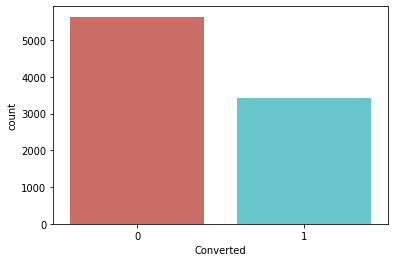

In [92]:
df.Converted.value_counts()
sns.countplot(x = 'Converted', data = df, palette = 'hls')
plt.show()

### Looking for Correlations

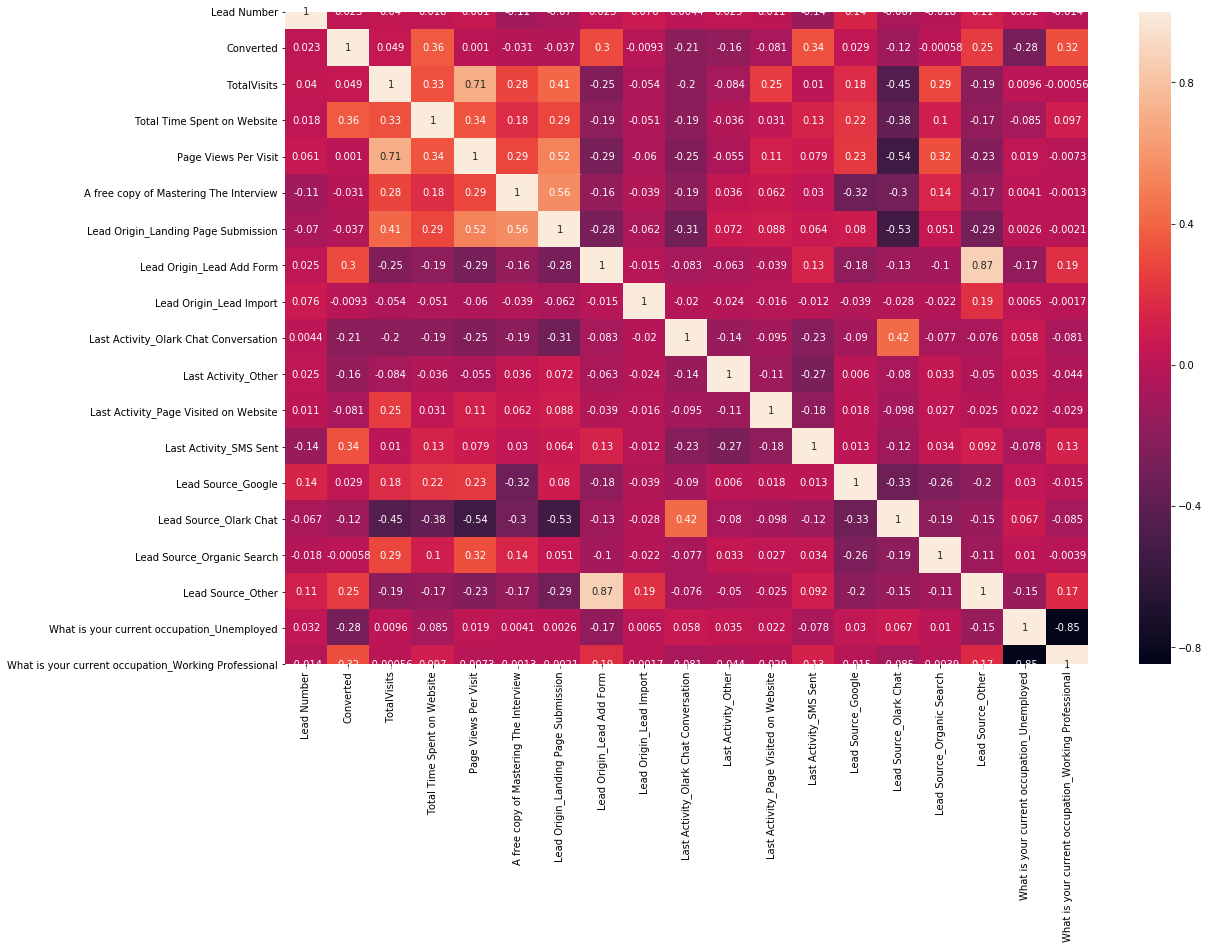

In [93]:
plt.figure(figsize = (18,12))        
sns.heatmap(df.corr(),annot = True)
plt.show()

## Model Building

In [94]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2729.2
Date:                Mon, 01 Jun 2020   Deviance:                       5458.5
Time:                        18:22:28   Pearson chi2:                 6.85e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7945      0.231     -3.447      0.001      -1.246      -0.343
TotalVisits                                              0.3321      0.049      6.791      0.000       0.236       0.428
Total Time Spent on Website                              1.1276      0.040     28.390      0.000       1.050       1.205
Page Views Per Visit                                    -0.2049      0.055     -3.734      0.000      -0.312      -0.097
A free copy of Mastering The Interview                   0.0287      0.103      0.278      0.781      -0.174       0.231
Lead Origin_Landing Page Submission                     -0.2000      0.103     -1.936      0.053      -0.402       0.003
Lead Origin_Lead Add Form                                4.2623      0.363     11.747      0.000       3.551       4.973
Lead Origin_Lead Import                                  1.4866      0.546      2.724      0.006       0.417       2.556
Last Activity_Olark Chat Conversation                   -1.6443      0.163    -10.074      0.000      -1.964      -1.324
Last Activity_Other                                     -0.7313      0.116     -6.297      0.000      -0.959      -0.504
Last Activity_Page Visited on Website                   -0.7755      0.152     -5.100      0.000      -1.073      -0.477
Last Activity_SMS Sent                                   1.1293      0.078     14.398      0.000       0.976       1.283
Lead Source_Google                                       0.3978      0.110      3.630      0.000       0.183       0.613
Lead Source_Olark Chat                                   1.4401      0.157      9.157      0.000       1.132       1.748
Lead Source_Organic Search                               0.0763      0.126      0.603      0.546      -0.172       0.324
Lead Source_Other                                        0.0966      0.305      0.316      0.752      -0.502       0.695
What is your current occupation_Unemployed              -0.6278      0.202     -3.106      0.002      -1.024      -0.232
What is your current occupation_Working Professional     2.1896      0.270      8.117      0.000       1.661       2.718
========================================================================================================================
"""

### Feature Selection using RFE

In [95]:
logreg = LogisticRegression()

In [96]:
rfe = RFE(logreg, 15)          
rfe = rfe.fit(X_train, y_train)

In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Other', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [98]:
# Columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Other',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [99]:
# Columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Lead Source_Organic Search'], dtype='object')

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2729.4
Date:                Mon, 01 Jun 2020   Deviance:                       5458.9
Time:                        18:22:31   Pearson chi2:                 6.85e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7493      0.219     -3.427      0.001      -1.178      -0.321
TotalVisits                                              0.3366      0.048      6.969      0.000       0.242       0.431
Total Time Spent on Website                              1.1276      0.040     28.406      0.000       1.050       1.205
Page Views Per Visit                                    -0.1993      0.054     -3.715      0.000      -0.304      -0.094
Lead Origin_Landing Page Submission                     -0.2101      0.092     -2.281      0.023      -0.391      -0.030
Lead Origin_Lead Add Form                                4.2713      0.362     11.787      0.000       3.561       4.982
Lead Origin_Lead Import                                  1.4940      0.545      2.740      0.006       0.425       2.563
Last Activity_Olark Chat Conversation                   -1.6448      0.163    -10.078      0.000      -1.965      -1.325
Last Activity_Other                                     -0.7295      0.116     -6.293      0.000      -0.957      -0.502
Last Activity_Page Visited on Website                   -0.7803      0.152     -5.136      0.000      -1.078      -0.483
Last Activity_SMS Sent                                   1.1305      0.078     14.427      0.000       0.977       1.284
Lead Source_Google                                       0.3555      0.081      4.403      0.000       0.197       0.514
Lead Source_Olark Chat                                   1.4037      0.145      9.668      0.000       1.119       1.688
Lead Source_Other                                        0.0511      0.296      0.172      0.863      -0.530       0.632
What is your current occupation_Unemployed              -0.6253      0.202     -3.095      0.002      -1.021      -0.229
What is your current occupation_Working Professional     2.1902      0.270      8.123      0.000       1.662       2.719
========================================================================================================================
"""

#### Dropping the variable and rebuilding the model
- Lead Source_Other is highly insignificant.Hence dropping the column and rebuilding the model again

In [101]:
X_train_v1 = X_train_sm.drop(["Lead Source_Other","const"], axis = 1)

In [102]:
col = X_train_v1.columns
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [103]:
X_train_v1_sm = sm.add_constant(X_train_v1[col])
logm2 = sm.GLM(y_train,X_train_v1_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2729.5
Date:                Mon, 01 Jun 2020   Deviance:                       5458.9
Time:                        18:22:34   Pearson chi2:                 6.85e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7460      0.218     -3.425      0.001      -1.173      -0.319
TotalVisits                                              0.3368      0.048      6.971      0.000       0.242       0.431
Total Time Spent on Website                              1.1273      0.040     28.421      0.000       1.050       1.205
Page Views Per Visit                                    -0.1989      0.054     -3.711      0.000      -0.304      -0.094
Lead Origin_Landing Page Submission                     -0.2126      0.091     -2.337      0.019      -0.391      -0.034
Lead Origin_Lead Add Form                                4.3191      0.234     18.490      0.000       3.861       4.777
Lead Origin_Lead Import                                  1.5418      0.470      3.283      0.001       0.621       2.462
Last Activity_Olark Chat Conversation                   -1.6441      0.163    -10.078      0.000      -1.964      -1.324
Last Activity_Other                                     -0.7292      0.116     -6.290      0.000      -0.956      -0.502
Last Activity_Page Visited on Website                   -0.7797      0.152     -5.133      0.000      -1.077      -0.482
Last Activity_SMS Sent                                   1.1301      0.078     14.429      0.000       0.977       1.284
Lead Source_Google                                       0.3534      0.080      4.431      0.000       0.197       0.510
Lead Source_Olark Chat                                   1.4003      0.144      9.733      0.000       1.118       1.682
What is your current occupation_Unemployed              -0.6249      0.202     -3.093      0.002      -1.021      -0.229
What is your current occupation_Working Professional     2.1906      0.270      8.126      0.000       1.662       2.719
========================================================================================================================
"""

### Checking VIF for the model

In [104]:
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [105]:
X_train_vif = X_train_v1_sm.drop(['const'], axis=1)

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,7.21
3,Lead Origin_Landing Page Submission,3.60
11,Lead Source_Olark Chat,3.09
2,Page Views Per Visit,2.63
0,TotalVisits,2.20
9,Last Activity_SMS Sent,1.86
4,Lead Origin_Lead Add Form,1.81
10,Lead Source_Google,1.81
13,What is your current occupation_Working Profes...,1.63
6,Last Activity_Olark Chat Conversation,1.50


#### Dropping the variable and rebuilding the model
-What is your current occupation_Unemployed has a high VIF.Hence droppng the column and rebuilding the model again

In [107]:
X_train_v2 = X_train_v1_sm.drop(['What is your current occupation_Unemployed','const'], axis = 1)

In [108]:
col = X_train_v2.columns
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Lead Source_Google',
       'Lead Source_Olark Chat',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [109]:
X_train_v2_sm = sm.add_constant(X_train_v2[col])
logm2 = sm.GLM(y_train,X_train_v2_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2734.1
Date:                Mon, 01 Jun 2020   Deviance:                       5468.2
Time:                        18:22:40   Pearson chi2:                 6.87e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3443      0.102    -13.243      0.000      -1.543      -1.145
TotalVisits                                              0.3346      0.048      6.935      0.000       0.240       0.429
Total Time Spent on Website                              1.1285      0.040     28.468      0.000       1.051       1.206
Page Views Per Visit                                    -0.1983      0.054     -3.704      0.000      -0.303      -0.093
Lead Origin_Landing Page Submission                     -0.2088      0.091     -2.299      0.022      -0.387      -0.031
Lead Origin_Lead Add Form                                4.3279      0.233     18.541      0.000       3.870       4.785
Lead Origin_Lead Import                                  1.5194      0.469      3.239      0.001       0.600       2.439
Last Activity_Olark Chat Conversation                   -1.6414      0.163    -10.079      0.000      -1.961      -1.322
Last Activity_Other                                     -0.7373      0.116     -6.364      0.000      -0.964      -0.510
Last Activity_Page Visited on Website                   -0.7835      0.152     -5.162      0.000      -1.081      -0.486
Last Activity_SMS Sent                                   1.1119      0.078     14.264      0.000       0.959       1.265
Lead Source_Google                                       0.3446      0.080      4.330      0.000       0.189       0.501
Lead Source_Olark Chat                                   1.3986      0.144      9.726      0.000       1.117       1.680
What is your current occupation_Working Professional     2.7956      0.186     15.015      0.000       2.431       3.160
========================================================================================================================
"""

In [110]:
X_train_vif_v2 = X_train_v2_sm.drop(['const'], axis=1)

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_vif_v2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,2.63
0,TotalVisits,2.19
11,Lead Source_Olark Chat,2.06
3,Lead Origin_Landing Page Submission,2.04
9,Last Activity_SMS Sent,1.66
4,Lead Origin_Lead Add Form,1.44
6,Last Activity_Olark Chat Conversation,1.42
10,Lead Source_Google,1.38
1,Total Time Spent on Website,1.31
7,Last Activity_Other,1.27


##### None of the parameters have a VIF greater than 5.

In [112]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_v2_sm)
y_train_pred[:10]

3009    0.137249
1012    0.448017
9226    0.512975
4750    0.787312
7987    0.879862
1281    0.738854
2880    0.090800
4971    0.897873
7536    0.809331
1248    0.825064
dtype: float64

In [113]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13724941, 0.44801694, 0.51297479, 0.78731172, 0.87986242,
       0.73885421, 0.09079976, 0.8978734 , 0.8093306 , 0.82506389])

In [114]:
y_train_pred

array([0.13724941, 0.44801694, 0.51297479, ..., 0.95171645, 0.20508941,
       0.24009753])

In [115]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.137249,3009
1,0,0.448017,1012
2,0,0.512975,9226
3,1,0.787312,4750
4,1,0.879862,7987


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [116]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.137249,3009,0
1,0,0.448017,1012,0
2,0,0.512975,9226,1
3,1,0.787312,4750,1
4,1,0.879862,7987,1


### Confusion Matrix

In [117]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3437  468]
 [ 738 1708]]


In [118]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted ))

0.810108644307983


##### The accuracy of the model is 81%

In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Sensitivity
TP / float(TP+FN)

0.6982829108748978

In [121]:
# Specificity
TN / float(TN+FP)

0.8801536491677336

In [122]:
# positive predictive value 
print (TP / float(TP+FP))

0.7849264705882353


In [123]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8232335329341317


### Plotting the ROC Curve

In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

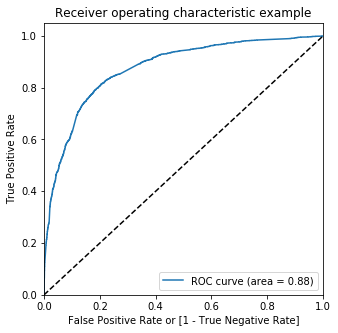

In [126]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding the optimal cutoff Range

In [127]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.137249,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.448017,1012,0,1,1,1,1,1,0,0,0,0,0
2,0,0.512975,9226,1,1,1,1,1,1,1,0,0,0,0
3,1,0.787312,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.879862,7987,1,1,1,1,1,1,1,1,1,1,0


In [128]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.603055  0.966067  0.375672
0.2   0.2  0.722248  0.921096  0.597695
0.3   0.3  0.796253  0.828700  0.775928
0.4   0.4  0.810266  0.758790  0.842510
0.5   0.5  0.810109  0.698283  0.880154
0.6   0.6  0.790112  0.579313  0.922151
0.7   0.7  0.773894  0.498774  0.946223
0.8   0.8  0.753110  0.409648  0.968246
0.9   0.9  0.701779  0.244890  0.987964


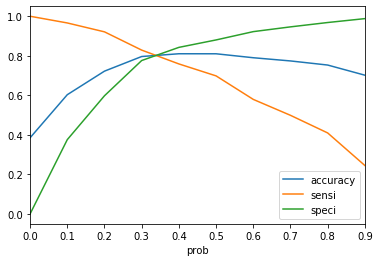

In [129]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [130]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.137249,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.448017,1012,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.512975,9226,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.787312,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.879862,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [131]:
# Accuracy of the model
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8061722563375846

In [132]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3174,  731],
       [ 500, 1946]], dtype=int64)

In [133]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [134]:
# Sensitivity
TP / float(TP+FN)

0.7955846279640229

In [135]:
# Specificity
TN / float(TN+FP)

0.8128040973111396

In [136]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18719590268886044


In [137]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7269331341053418


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8639085465432771


### Precision and Recall

In [139]:
# Precision
precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.7849264705882353

In [140]:
# Recall
recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.6982829108748978

In [142]:
# F1 Score
F1= 2 *((precision*recall)/(precision + recall))
F1

0.7390739939420164

#### Using sklearn utilities for calculation precision and recall

In [143]:
# Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted )

0.7849264705882353

In [144]:
# recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6982829108748978

### Precision and Recall Tradeoff

In [145]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

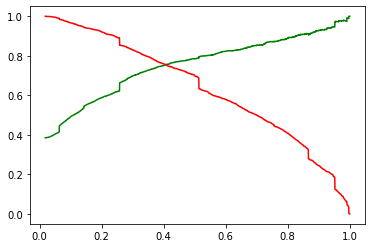

In [146]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the Test dataset

In [147]:
scalecols =['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[scalecols ] = scaler.transform(X_test[scalecols ])

In [148]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,What is your current occupation_Working Professional
3271,0.200018,-0.600595,0.828532,0,0,0,0,0,0,0,1,0,0
1490,0.508645,1.887326,1.331447,1,0,0,0,0,0,0,0,0,1
7936,-0.417238,-0.752879,-0.177298,0,0,0,0,0,0,0,1,0,0
4216,-1.034493,-0.888650,-1.183128,0,1,0,0,0,0,0,0,0,0
3830,1.434528,-0.587751,2.840192,1,0,0,0,0,0,0,0,0,0


In [149]:
# Adding constant value
X_test_sm = sm.add_constant(X_test)

##### Making predictions in the test dataset

In [150]:
y_test_pred = res.predict(X_test_sm)

In [151]:
y_test_pred[:10]

3271    0.144944
1490    0.963683
7936    0.124146
4216    0.866379
3830    0.091161
1800    0.721228
6507    0.282268
4821    0.223004
4223    0.951716
4714    0.512975
dtype: float64

In [152]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [153]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [154]:
# Putting Lead Number  to index
y_test_df['Lead Number'] = y_test_df.index

In [155]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [156]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [157]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.144944
1,1,1490,0.963683
2,0,7936,0.124146
3,1,4216,0.866379
4,0,3830,0.091161


In [158]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [159]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [160]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,3271,0,0.144944
1,1490,1,0.963683
2,7936,0,0.124146
3,4216,1,0.866379
4,3830,0,0.091161


#### Selecting the value of 0.4 from the Precision Recall Tradeoff Curve

In [161]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [162]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,3271,0,0.144944,0
1,1490,1,0.963683,1
2,7936,0,0.124146,0
3,4216,1,0.866379,1
4,3830,0,0.091161,0


In [163]:
# Accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8090341535071612

In [164]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1460,  274],
       [ 246,  743]], dtype=int64)

In [165]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [166]:
# Sensitivity 
TP / float(TP+FN)

0.7512639029322548

In [167]:
# Specificity
TN / float(TN+FP)

0.8419838523644751

In [168]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7305801376597837


In [169]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8558030480656507


#### Top Leads for each of the Lead Number

In [175]:
y_pred_final[y_pred_final['final_predicted']==1]

,Lead Number,Converted,Converted_Prob,final_predicted
1,1490,1,0.963683,1
3,4216,1,0.866379,1
5,1800,1,0.721228,1
8,4223,1,0.951716,1
9,4714,0,0.512975,1
...,...,...,...,...
2712,8874,1,0.512975,1
2715,6299,1,0.830244,1
2716,7852,1,0.512975,1
2717,2258,0,0.845814,1


#### Cold Leads for each of the lead Number

In [176]:
y_pred_final[y_pred_final['final_predicted']==0]

,Lead Number,Converted,Converted_Prob,final_predicted
0,3271,0,0.144944,0
2,7936,0,0.124146,0
4,3830,0,0.091161,0
6,6507,0,0.282268,0
7,4821,0,0.223004,0
...,...,...,...,...
2714,6448,0,0.142181,0
2718,850,0,0.234422,0
2719,2879,0,0.137814,0
2721,7155,0,0.169317,0
